In [10]:
def function_1(input_1):
    return input_1 + "First Function"
def function_2(input_2):
    return input_2 + "Second Function"

In [6]:
from langgraph.graph import Graph

workflow = Graph()

workflow.add_node("node_1", function_1)
workflow.add_node("node_2", function_2)

workflow.add_edge('node_1', 'node_2')

workflow.set_entry_point("node_1")
workflow.set_finish_point("node_2")

app = workflow.compile()

In [3]:
app.invoke('I am moving from')

'I am moving fromFirst FunctionSecond Function'

In [2]:
#LLM WITH LANGGRAPH
from langchain_groq import ChatGroq
llm = ChatGroq(model_name = "llama3-70b-8192")
llm.invoke("hi")

AIMessage(content="Hi! It's nice to meet you. Is there something I can help you with, or would you like to chat?", additional_kwargs={}, response_metadata={'token_usage': {'completion_tokens': 26, 'prompt_tokens': 11, 'total_tokens': 37, 'completion_time': 0.074285714, 'prompt_time': 0.000123918, 'queue_time': 0.094131327, 'total_time': 0.074409632}, 'model_name': 'llama3-70b-8192', 'system_fingerprint': 'fp_dd4ae1c591', 'finish_reason': 'stop', 'logprobs': None}, id='run--0592c1e0-836c-45d7-aa53-baebb7814e48-0', usage_metadata={'input_tokens': 11, 'output_tokens': 26, 'total_tokens': 37})

In [4]:
def function_1(input_1):
    complete_query = "Your task is to provide only the topic based on the user query. \
        Only output the topic among: [Japan , Sports]. Don't include reasoning. Following is the user query: " + input_1
    response = llm.invoke(complete_query)
    return response.content
def function_2(input_2):
    TOPIC_UPPER = input_2.upper()
    response =f"Here is the topic in upper case: {TOPIC_UPPER}"
    return response

In [7]:
workflow = Graph()

workflow.add_node("Agent", function_1)
workflow.add_node("Tool", function_2)

workflow.add_edge('Agent', 'Tool')

workflow.set_entry_point('Agent')
workflow.set_finish_point('Tool')

app = workflow.compile()

In [8]:
query = "Tell me about Japan's Industrial Growth"
app.invoke(query)

'Here is the topic in upper case: JAPAN'

In [9]:
for output in app.stream(query):
    for key, value in output.items():
        print(f"Output from node '{key}':")
        print("---")
        print(value)
    print("\n---\n")

Output from node 'Agent':
---
Japan

---

Output from node 'Tool':
---
Here is the topic in upper case: JAPAN

---



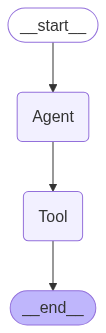

In [12]:
from IPython.display import Image, display

try:
    display(Image(app.get_graph().draw_mermaid_png()))
except Exception as e:
    print(e)

#workflow2 phase 2

In [2]:
from langchain_groq import ChatGroq
llm=ChatGroq(model_name="llama3-70b-8192")
llm.invoke("hi").content

"Hi! It's nice to meet you. Is there something I can help you with, or would you like to chat?"

In [3]:
from langchain.embeddings import HuggingFaceBgeEmbeddings

model_name = "BAAI/bge-base-en-v1.5"
model_kwargs = {'device': 'cpu'}
encode_kwargs = {'normalize_embeddings': True} # set True to compute cosine similarity
embeddings = HuggingFaceBgeEmbeddings(
    model_name=model_name,
    model_kwargs=model_kwargs,
    encode_kwargs=encode_kwargs,)

C:\Users\priya\AppData\Local\Temp\ipykernel_1832\1467528996.py:6: LangChainDeprecationWarning: The class `HuggingFaceBgeEmbeddings` was deprecated in LangChain 0.2.2 and will be removed in 1.0. An updated version of the class exists in the :class:`~langchain-huggingface package and should be used instead. To use it run `pip install -U :class:`~langchain-huggingface` and import as `from :class:`~langchain_huggingface import HuggingFaceEmbeddings``.
  embeddings = HuggingFaceBgeEmbeddings(
c:\Users\priya\Downloads\test\venv\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [4]:
def function_1(input):
    llm = ChatGroq(model_name="llama3-70b-8192")
    response = llm.invoke(input).content
    return response
def function_2(input):
    upper_case = input.upper()
    return upper_case

In [33]:
from langgraph.graph import Graph
workflow2 = Graph()
workflow2.add_node("llm", function_1)
workflow2.add_node("upper_string", function_2)

workflow2.add_edge("llm","upper_string")

workflow2.set_entry_point("llm")
workflow2.set_finish_point("upper_string")

In [34]:
app2 = workflow2.compile()

In [35]:
app2.invoke("what is a name of first indian prime minister?")

'THE FIRST PRIME MINISTER OF INDIA WAS JAWAHARLAL NEHRU.'

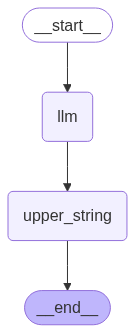

In [37]:
from IPython.display import Image, display
try:
    display(Image(app2.get_graph().draw_mermaid_png()))
except Exception as e:
    print(e)

In [1]:
#workflow3 
def function3(input):
    token = input.split()
    token_number = len(token)
    token_number=f"total token number is {token_number}"
    return token_number

In [6]:
from langgraph.graph import Graph

workflow3= Graph()
workflow3.add_node("llm", function_1)
workflow3.add_node("token_counter", function3)
workflow3.add_edge("llm","token_counter")
workflow3.set_entry_point("llm")
workflow3.set_finish_point("token_counter")
app3 = workflow3.compile()

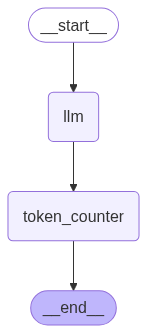

In [7]:
from IPython.display import Image, display
try:
    display(Image(app3.get_graph().draw_mermaid_png()))
except Exception as e:
    print(e)

In [8]:
app3.invoke("What is the captial of India?")

'total token number is 7'